# Importing required packages
* tesnsorflow, numpy, pandas
* cv2 for drawing rectangle on images
* tdqm for showing progress bar
* shutil for copying images

In [ ]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
  inflating: data/sample_submission.csv  
  inflating: data/testing_images/vid_5_25100.jpg  
  inflating: data/testing_images/vid_5_25120.jpg  
  inflating: data/testing_images/vid_5_25140.jpg  
  inflating: data/testing_images/vid_5_25160.jpg  
  inflating: data/testing_images/vid_5_25180.jpg  
  inflating: data/testing_images/vid_5_25200.jpg  
  inflating: data/testing_images/vid_5_25220.jpg  
  inflating: data/testing_images/vid_5_25240.jpg  
  inflating: data/testing_images/vid_5_25260.jpg  
  inflating: data/testing_images/vid_5_26320.jpg  
  inflating: data/testing_images/vid_5_26400.jpg  
  inflating: data/testing_images/vid_5_26420.jpg  
  inflating: data/testing_images/vid_5_26560.jpg  
  inflating: data/testing_images/vid_5_26580.jpg  
  inflating: data/testing_images/vid_5_26600.jpg  
  inflating: data/testing_images/vid_5_26620.jpg  
  inflating: data/testing_images/vid_5_26640.jpg  
  inflating: data/testing_images/vid_5_26660.jpg  
  inf

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random

from tqdm.auto import tqdm
import shutil as sh
from PIL import Image

# Importing images for training our custom traning set
* **train_dir**: training images 
* **test_dir**: testing images
* **data**: value of boxes co-ordinates on images(xmin,ymin,xmax,ymax)

In [ ]:
train_dir = "/content/data/training_images/"
test_dir = "/content/data/testing_images/"

print('Image(train): ', len(os.listdir(train_dir)))
print('Image(test): ', len(os.listdir(test_dir)))

Image(train):  1001
Image(test):  175


In [ ]:
data = pd.read_csv("/content/data/train_solution_bounding_boxes (1).csv")

In [ ]:
data.head()

image        xmin        ymin        xmax        ymax
0   vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547
1  vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180
2  vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180
3  vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575
4  vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422

In [ ]:
print(data.shape)
data.nunique()

(559, 5)


image    355
xmin     440
ymin     149
xmax     438
ymax     184
dtype: int64

# Showing training Images with green boxes on car

(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_9620.jpg
xmin          111.76402
ymin         194.876133
xmax         226.974508
ymax         241.637791
Name: 538, dtype: object


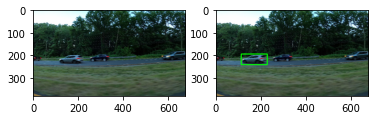

(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_9820.jpg
xmin         387.481427
ymin         179.617066
xmax         510.077203
ymax           234.7466
Name: 552, dtype: object


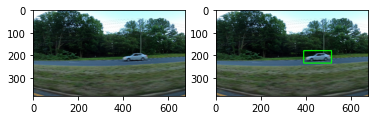

(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_9700.jpg
xmin           587.8689
ymin         184.047118
xmax              676.0
ymax         223.425356
Name: 546, dtype: object


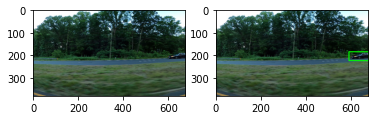

(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_26520.jpg
xmin           81.198263
ymin          197.580438
xmax          171.201158
ymax           235.94112
Name: 343, dtype: object


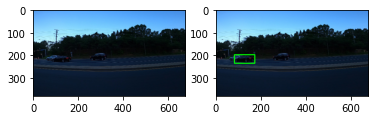

In [ ]:
IMAGE_SHAPE = 0
for i in range(4):
    plt.subplot(1,2,1)
    rand = np.random.randint(0, data.shape[0])
    random_row = data.iloc[rand]
    image = plt.imread(train_dir + random_row[0])
    plt.imshow(image)
    plt.subplot(1,2,2)
    IMAGE_SHAPE = image.shape
    print(image.shape)
    print('Name,xmin,ymin,xmax,ymax:',random_row)
    point1 = (int(random_row[1]), int(random_row[2]))
    point2 = (int(random_row[3]), int(random_row[4]))
    cv2.rectangle(image, point1, point2, color=(0, 255, 0), thickness=3)
    plt.imshow(image)
    plt.show()

# Cloning yolov5 from github

**Link:** https://github.com/ultralytics/yolov5 

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r ./yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15236, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15236 (delta 6), reused 12 (delta 4), pack-reused 15218
Receiving objects: 100% (15236/15236), 14.17 MiB | 20.13 MiB/s, done.
Resolving deltas: 100% (10442/10442), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into acc

# Data processing

Converting (xmin,ymin,xmax,ymax) to (x_center,y_center, w, h) as yolo5 required that format.

In [ ]:
im_h, im_w, num_chanels = IMAGE_SHAPE
data["x_center"] = (data["xmax"] + data["xmin"])/2
data["y_center"] = (data["ymax"] + data["ymin"])/2
data["w"] = data["xmax"] - data["xmin"]
data["h"] = data["ymax"] - data["ymin"]
data["classes"] = 0
#Normalizing the values with image height and width
data["x_center"] = data["x_center"]/im_w
data["w"] = data["w"]/im_w
data["y_center"] = data["y_center"]/im_h
data["h"] = data["h"]/im_h
data.head()

image        xmin        ymin        xmax        ymax  x_center  \
0   vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547  0.450434   
1  vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180  0.100217   
2  vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180  0.444645   
3  vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575  0.833213   
4  vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422  0.110347   

   y_center         w         h  classes  
0  0.539817  0.068741  0.095238        0  
1  0.557191  0.155572  0.129987        0  
2  0.543678  0.181621  0.157014        0  
3  0.531451  0.197540  0.155727        0  
4  0.559122  0.171491  0.136422        0

In [ ]:
index = list(data.image)
print(len(index))

559


# Training with yolov5 model

First we are going create a folder "data/fold0" and divide our training images into train and validation set. We are going to create a txt file for each images with box co-ordinates(x_center, y_center, w, h).

**STEP-1: Creating a txt file for each images inside labels folder**

validation set: "data/fold0/labels/val/"

training set: "data/fold0/labels/train/"

**STEP-2: Copying images from each Input to folder**

validation images: "data/fold0/images/val/"

training images: "data/fold0/images/train/"

**STEP-3: Creating dataset.yaml**

Creating a dataset.yaml file as required for custom training the yolov5 model,which contains path to training data and validation data.

**STEP-4: Training the model with custom data**

We are going to train the model with:

    - Batch size = 12
    - Epochs = 12
    - CONF_TRESHOLD = 0.6
    - IOU_THRESHOLD = 0.5
    - MODEL = 'yolov5x.pt' (large model for better output)

In [ ]:
if not os.path.exists("data"):
    os.makedirs("data")
    os.makedirs("data/fold{}".format(0))

In [ ]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(data.groupby('image')):
            if name in val_index:
                path2save = 'val/'
            else:
                path2save = 'train/'
            if not os.path.exists('data/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('data/fold{}/labels/'.format(fold)+path2save)
            with open('data/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('data/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('data/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/content/data/{}/{}".format(source,name),'data/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))
        print("Copy done")
        print('Image(train): ', len(os.listdir('data/fold0/images/train/')))
        print('Image(test): ', len(os.listdir('data/fold0/images/val/')))

  0%|          | 0/355 [00:00<?, ?it/s]

Copy done
Image(train):  281
Image(test):  74


In [ ]:
%%writefile dataset.yaml
path: /content/data/fold0
train: /content/data/fold0/images/train/
val: /content/data/fold0/images/val/
test:

names:
    0: car

Writing dataset.yaml


In [ ]:
IMG_SIZE = IMAGE_SHAPE[1]
CONF_TRESHOLD = 0.6
IOU_THRESHOLD = 0.5
MODEL = 'yolov5x.pt'

In [ ]:
import time

start = time.perf_counter()

!python yolov5/train.py --batch 12 --epochs 100 --data dataset.yaml --weights {MODEL} --name my_model_5x

end = time.perf_counter()

total_time = end - start

print(f'Training time for {MODEL} model is: {total_time:0.2f} seconds')

train: weights=yolov5x.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=12, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=my_model_5x, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

In [ ]:
!ls yolov5/runs/train/my_model_5x/

confusion_matrix.png				    results.png
events.out.tfevents.1676993090.b979fce4fa6d.7070.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


In [ ]:
!zip -r /content/EVUALIATION.zip yolov5/runs/train/my_model_5x/*.png

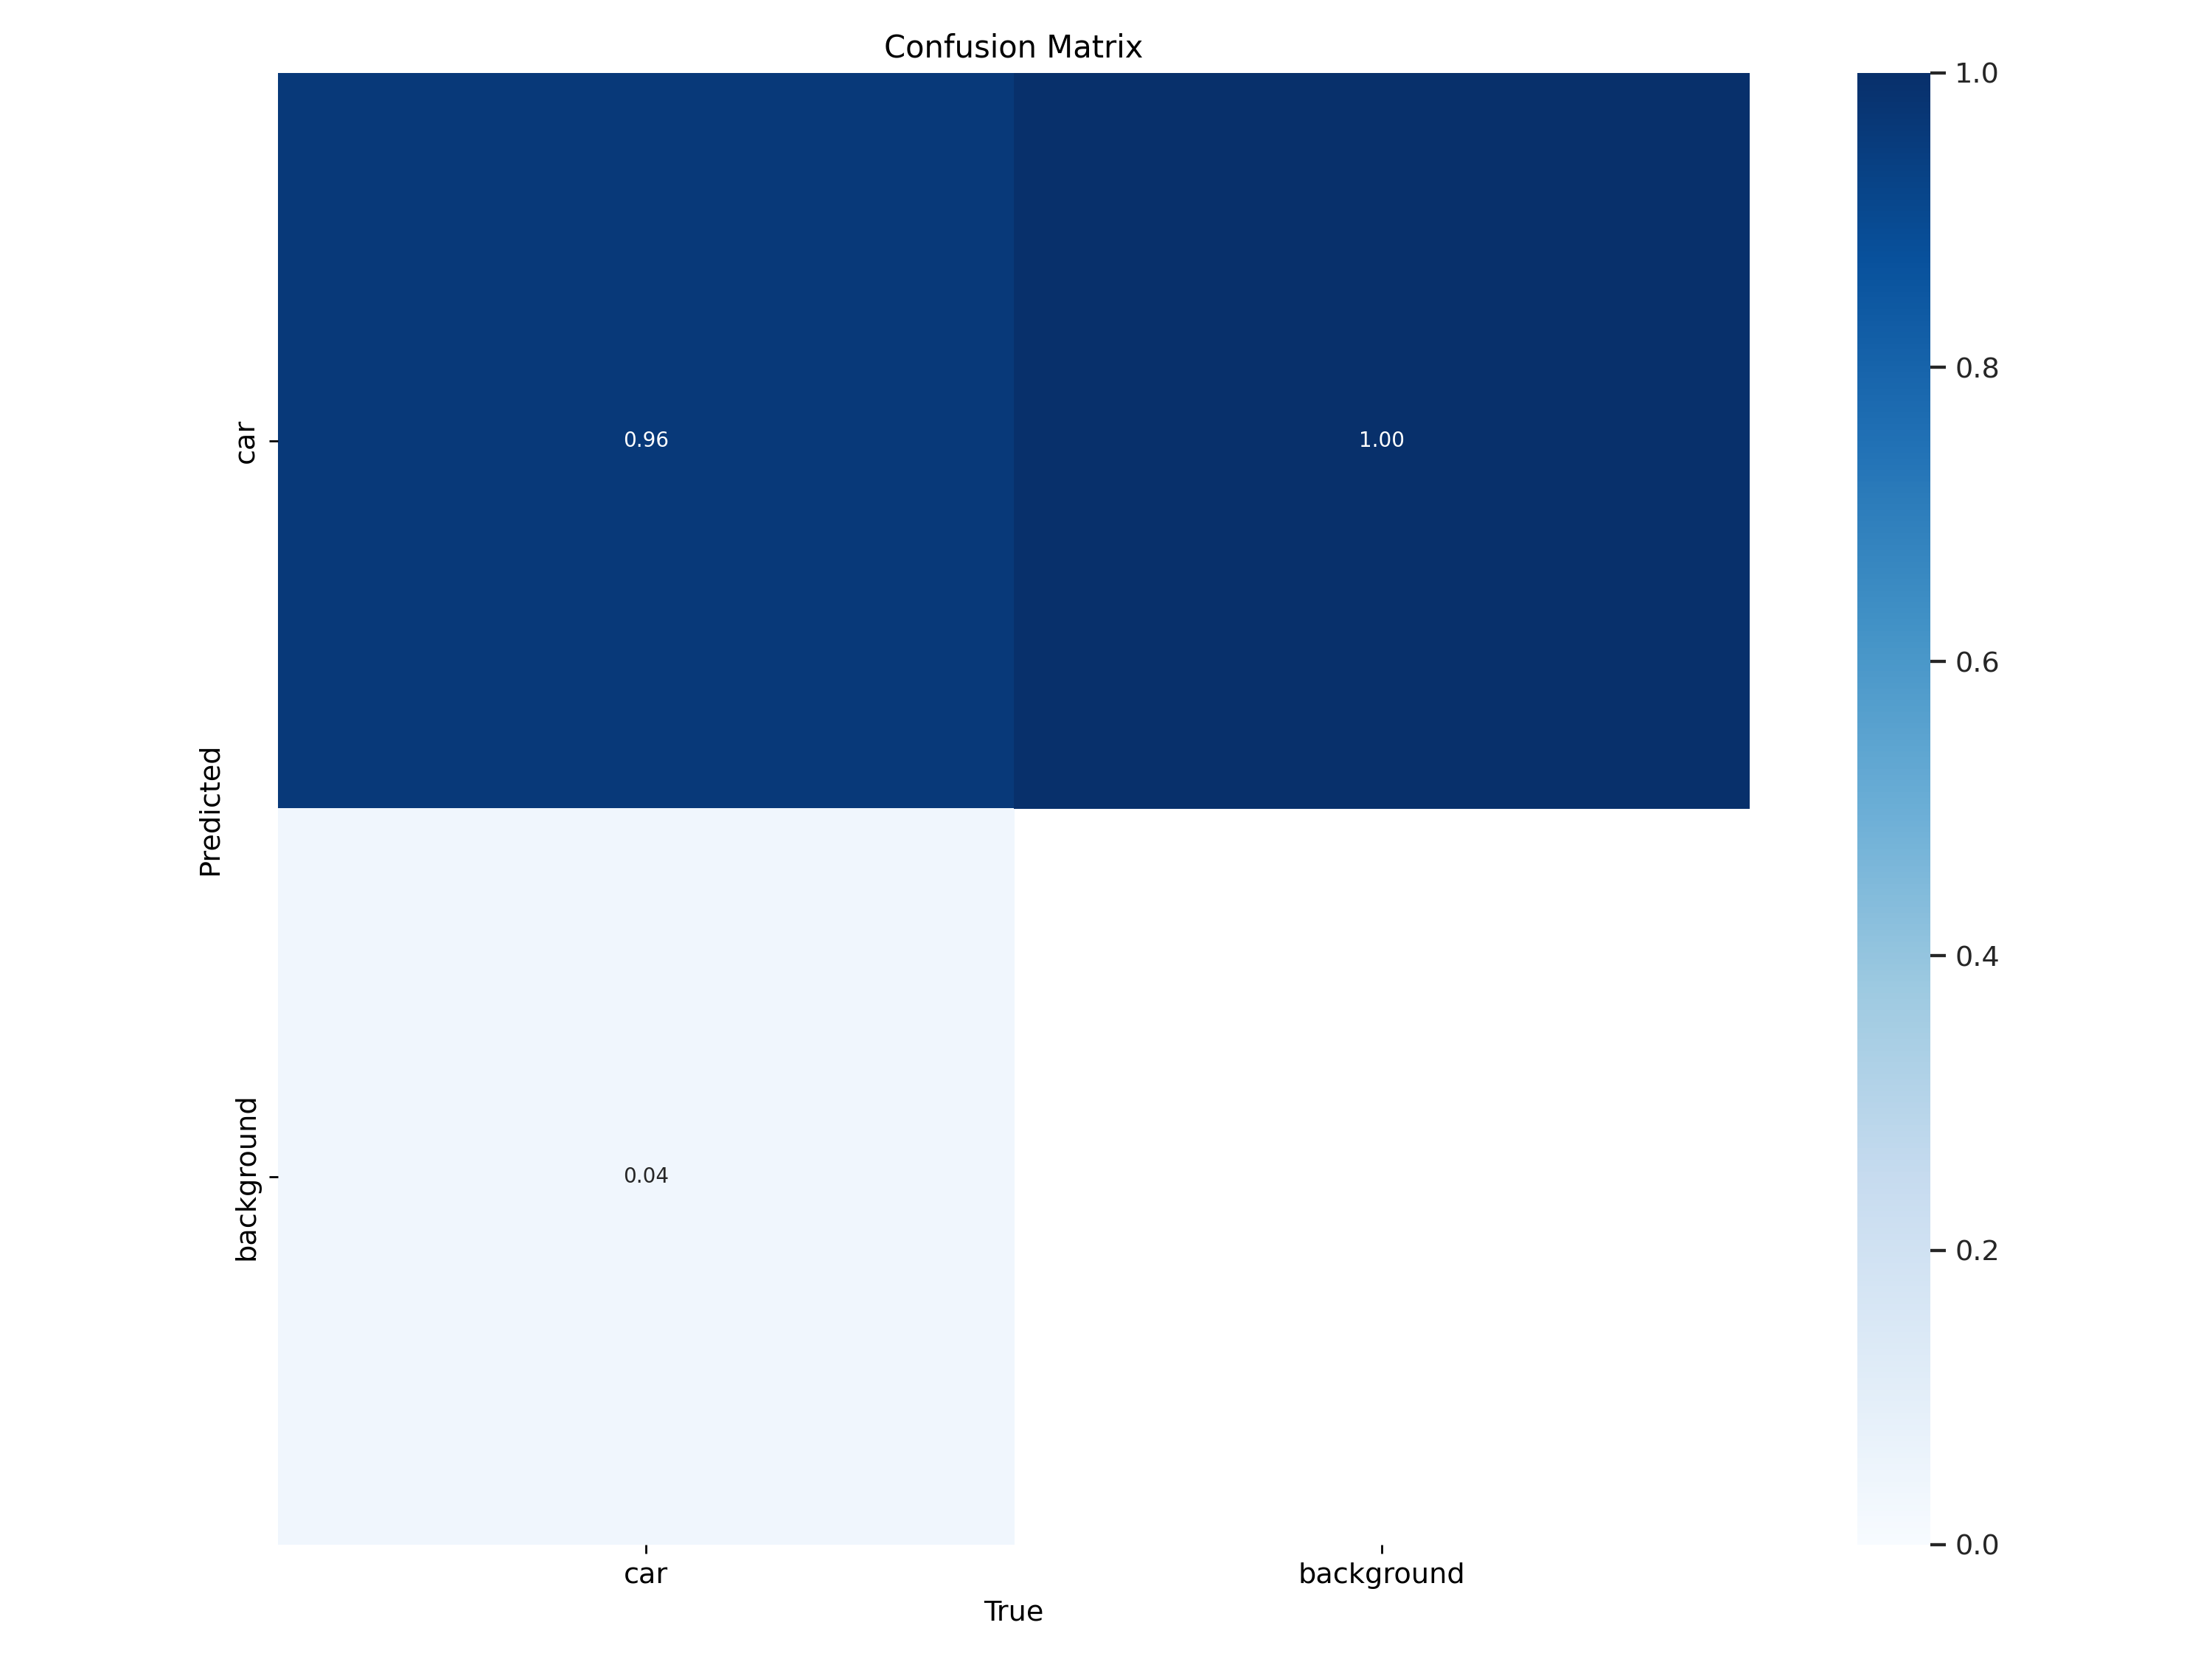

In [ ]:
Image.open("yolov5/runs/train/my_model_5x/confusion_matrix.png")

# Detecting cars on test images

We are now going to use our custom trained model to detect cars on our testing images. The wieghts of our train model are inside "yolov5/runs/train/my_model_5x/weights/best.pt".

In [ ]:
!python ./yolov5/detect.py --img {IMG_SIZE} --conf {CONF_TRESHOLD} --iou-thres {IOU_THRESHOLD} --source {test_dir} --weights yolov5/runs/train/my_model_5x/weights/best.pt

detect: weights=['yolov5/runs/train/my_model_5x/weights/best.pt'], source=/content/data/testing_images/, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.6, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 /content/data/testing_images/vid_5_25100.jpg: 416x704 (no detections), 71.6ms
image 2/175 /content/data/testing_images/vid_5_25120.jpg: 416x704 (no detections), 69.3ms
image 3/175 /content/data/testing_im

In [ ]:
!ls yolov5/runs/detect/exp/

vid_5_25100.jpg  vid_5_27460.jpg  vid_5_28540.jpg  vid_5_30640.jpg
vid_5_25120.jpg  vid_5_27480.jpg  vid_5_28560.jpg  vid_5_30660.jpg
vid_5_25140.jpg  vid_5_27500.jpg  vid_5_28580.jpg  vid_5_30680.jpg
vid_5_25160.jpg  vid_5_27520.jpg  vid_5_28600.jpg  vid_5_30700.jpg
vid_5_25180.jpg  vid_5_27540.jpg  vid_5_28620.jpg  vid_5_30720.jpg
vid_5_25200.jpg  vid_5_27560.jpg  vid_5_28640.jpg  vid_5_30740.jpg
vid_5_25220.jpg  vid_5_27580.jpg  vid_5_28660.jpg  vid_5_30760.jpg
vid_5_25240.jpg  vid_5_27600.jpg  vid_5_28680.jpg  vid_5_30820.jpg
vid_5_25260.jpg  vid_5_27620.jpg  vid_5_28700.jpg  vid_5_30840.jpg
vid_5_26320.jpg  vid_5_27640.jpg  vid_5_29000.jpg  vid_5_30860.jpg
vid_5_26400.jpg  vid_5_27660.jpg  vid_5_29020.jpg  vid_5_30920.jpg
vid_5_26420.jpg  vid_5_27680.jpg  vid_5_29040.jpg  vid_5_30940.jpg
vid_5_26560.jpg  vid_5_27700.jpg  vid_5_29060.jpg  vid_5_31020.jpg
vid_5_26580.jpg  vid_5_27720.jpg  vid_5_29080.jpg  vid_5_31040.jpg
vid_5_26600.jpg  vid_5_27740.jpg  vid_5_29100.jpg  vid_5_31060

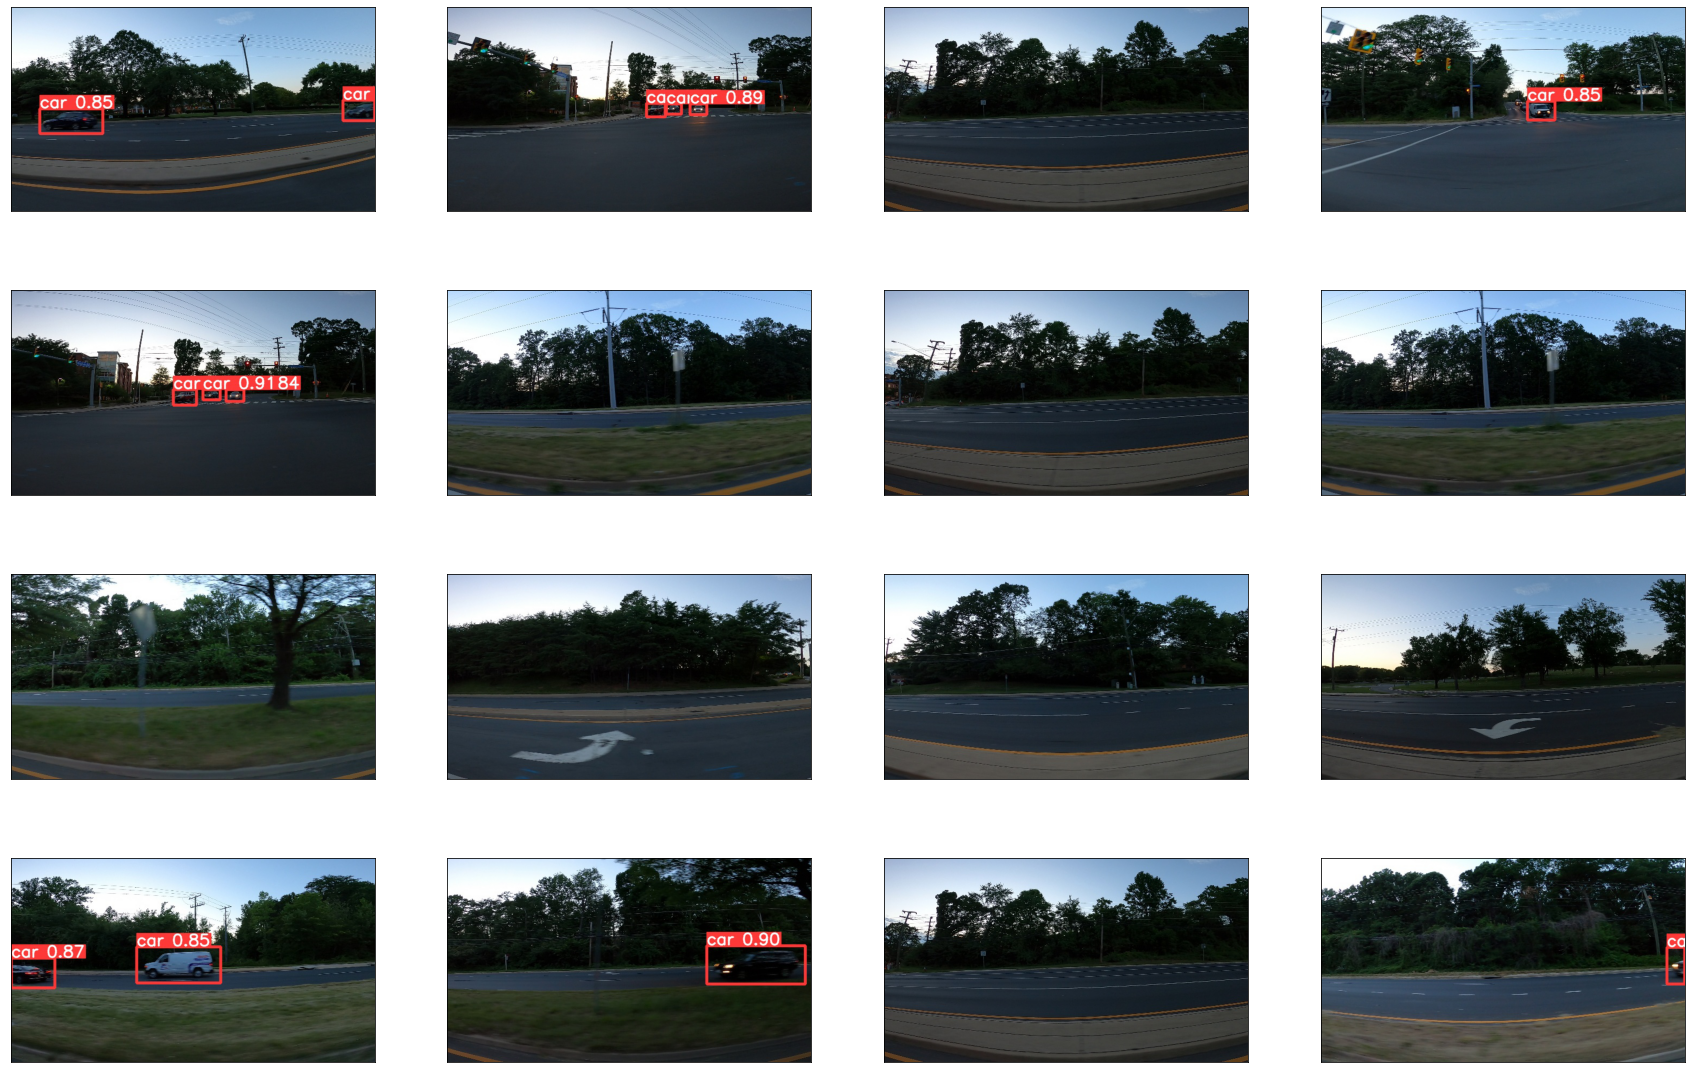

In [ ]:
pred_dir = './yolov5/runs/detect/exp'
file_paths = []
flist = os.listdir(pred_dir)
for file in flist:
    fpath = os.path.join(pred_dir, file)
    file_paths.append(fpath)

plt.figure(figsize=(30, 20))
for i in range(16):
    random = np.random.randint(0, len(file_paths) - 1)
    plt.subplot(4, 4, i + 1)
    img_path = file_paths[random]
    img = plt.imread(img_path)
    plt.imshow(img)
    #plt.title('Predictions', size=10, color="black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [ ]:
!zip -r /content/RESULT.zip /content/yolov5/runs/detect

  adding: content/yolov5/runs/detect/ (stored 0%)
  adding: content/yolov5/runs/detect/exp/ (stored 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_29460.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_31660.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_31600.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_30180.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_30020.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_26940.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_31020.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_27700.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_29020.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_28060.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_31520.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid_5_28080.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp/vid

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Vehicle Detection/1.jpg  
  inflating: Vehicle Detection/1.txt  
  inflating: Vehicle Detection/10.jpg  
  inflating: Vehicle Detection/10.txt  
  inflating: Vehicle Detection/100.jpg  
  inflating: Vehicle Detection/100.txt  
  inflating: Vehicle Detection/101.jpg  
  inflating: Vehicle Detection/101.txt  
  inflating: Vehicle Detection/102.jpg  
  inflating: Vehicle Detection/102.txt  
  inflating: Vehicle Detection/103.jpg  
  inflating: Vehicle Detection/103.txt  
  inflating: Vehicle Detection/104.jpg  
  inflating: Vehicle Detection/104.txt  
  inflating: Vehicle Detection/105.jpg  
  inflating: Vehicle Detection/105.txt  
  inflating: Vehicle Detection/106.jpg  
  inflating: Vehicle Detection/106.txt  
  inflating: Vehicle Detection/107.jpg  
  inflating: Vehicle Detection/107.txt  
  inflating: Vehicle Detection/108.jpg  
  inflating: Vehicle Detection/108.txt  
  inflating: Vehicle Detection/109.jpg  
  inflating: Vehicle Detection/109.txt  


In [ ]:
source_folder = r"/content/Vehicle Detection/"
destination_1 = r"/content/data/images/train/"
destination_2 = r"/content/data/images/val/"

dest_1 = r"/content/data/labels/train/"
dest_2 = r"/content/data/labels/val/"

if not os.path.exists(destination_1):
                os.makedirs(destination_1)
if not os.path.exists(destination_2):
                os.makedirs(destination_2)

if not os.path.exists(dest_1):
                os.makedirs(dest_1)
if not os.path.exists(dest_2):
                os.makedirs(dest_2)

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    if "jpg" in file_name:
      distin_1 = destination_1 + file_name
      distin_2 = destination_2 + file_name
    else:
      distin_1 = dest_1 + file_name
      distin_2 = dest_2 + file_name
    # copy only files
    if os.path.isfile(source):
        sh.copy(source, distin_1)
        sh.copy(source, distin_2)

In [ ]:
%%writefile dataset.yaml
path: /content/data/
train: /content/data/images/train/
val: /content/data/images/val/
test:

names:
    0: car

Overwriting dataset.yaml


In [ ]:
IMG_SIZE = IMAGE_SHAPE[1]
CONF_TRESHOLD = 0.6
IOU_THRESHOLD = 0.5
MODEL = 'yolov5x.pt'

In [ ]:
import time

start = time.perf_counter()

!python yolov5/train.py --batch 12 --epochs 20 --data dataset.yaml --weights {MODEL} --name my_model_5x

end = time.perf_counter()

total_time = end - start

print(f'Training time for {MODEL} model is: {total_time:0.2f} seconds')

train: weights=yolov5x.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=12, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=my_model_5x, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

In [ ]:
!ls yolov5/runs/train/my_model_5x/

confusion_matrix.png				    results.png
events.out.tfevents.1676993090.b979fce4fa6d.7070.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


In [ ]:
!python ./yolov5/detect.py  --conf {CONF_TRESHOLD} --iou-thres {IOU_THRESHOLD} --source "/content/Vehicle Detection/*.jpg" --weights yolov5/runs/train/my_model_5x/weights/best.pt

detect: weights=['yolov5/runs/train/my_model_5x/weights/best.pt'], source=/content/Vehicle Detection/*.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
image 1/1262 /content/Vehicle Detection/1.jpg: 384x640 9 cars, 53.9ms
image 2/1262 /content/Vehicle Detection/10.jpg: 384x640 9 cars, 37.4ms
image 3/1262 /content/Vehicle Detection/100.jpg: 384x640 8 cars, 36.8ms
image 4/1262 /content/Vehicle Detection/101.jpg: 384x640 9 cars, 37.0ms
image 5/1262 /conte

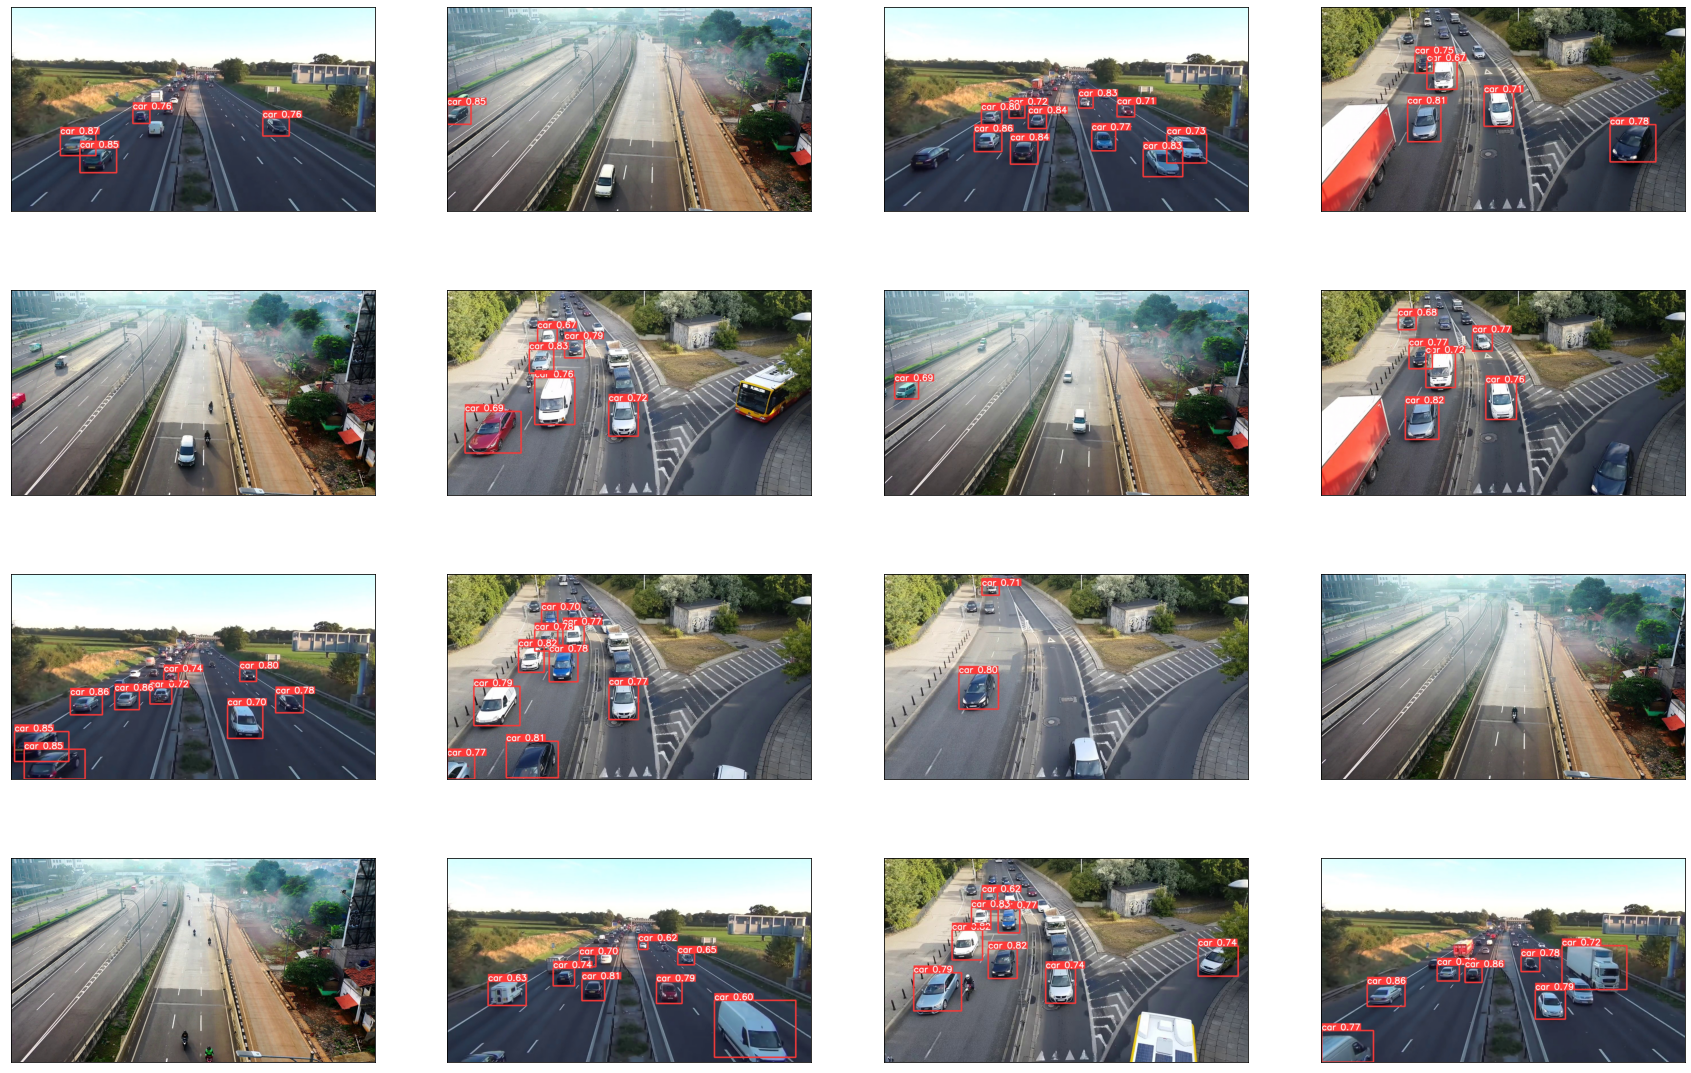

In [ ]:
pred_dir = './yolov5/runs/detect/exp2'
file_paths = []
flist = os.listdir(pred_dir)
for file in flist:
    fpath = os.path.join(pred_dir, file)
    file_paths.append(fpath)

plt.figure(figsize=(30, 20))
for i in range(16):
    random = np.random.randint(0, len(file_paths) - 1)
    plt.subplot(4, 4, i + 1)
    img_path = file_paths[random]
    img = plt.imread(img_path)
    plt.imshow(img)
    #plt.title('Predictions', size=10, color="black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [ ]:
!zip -r /content/result.zip /content/yolov5/runs/detect/exp2

  adding: content/yolov5/runs/detect/exp2/ (stored 0%)
  adding: content/yolov5/runs/detect/exp2/128.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/1647.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/1673.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/224.jpg (deflated 2%)
  adding: content/yolov5/runs/detect/exp2/2527.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/2884.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp2/2844.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp2/358.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/47.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/2932.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp2/2582.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp2/323.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/2757.jpg (deflated 0%)
  adding: content/yolov5/runs/detect/exp2/436.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp2/

In [ ]:
!zip -r /content/evulation.zip yolov5/runs/train/my_model_5x/*.png

  adding: yolov5/runs/train/my_model_5x/confusion_matrix.png (deflated 37%)
  adding: yolov5/runs/train/my_model_5x/F1_curve.png (deflated 16%)
  adding: yolov5/runs/train/my_model_5x/P_curve.png (deflated 18%)
  adding: yolov5/runs/train/my_model_5x/PR_curve.png (deflated 24%)
  adding: yolov5/runs/train/my_model_5x/R_curve.png (deflated 15%)
  adding: yolov5/runs/train/my_model_5x/results.png (deflated 10%)
